In [1]:
import csv
import json

donnees_extraction = {
    'domaine_entreprise': [],
    'description_entreprise': [],
    'domaine_etudes': [],
    'degree_name': []
}


In [2]:
# Fonction pour extraire les données du fichier CSV
def extraire_donnees_csv(file_path):
    with open(file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            # Extraction des données nécessaires
            # Expériences
            experiences = row.get("experiences")
            if experiences:
                # Convertir la chaîne JSON en liste de dictionnaires
                experiences = json.loads(experiences)
                # Sélectionner les trois expériences les plus récentes
                for experience in experiences[:3]:
                    company = experience.get("company")
                    description = experience.get("description")
                    if company and description:
                      donnees_extraction['domaine_entreprise'].append(experience.get("company"))
                      donnees_extraction['description_entreprise'].append(experience.get("description"))
            # Éducation
            education = row.get("education")
            if education:
                # Convertir la chaîne JSON en listx de dictionnaires
                education = json.loads(education)
                field_of_study = experience.get("field_of_study")
                degree_name = experience.get("degree_name")
                # Sélectionner la dernière éducation
                last_education = education
                if field_of_study and degree_name:
                  donnees_extraction['domaine_etudes'].append(last_education.get("field_of_study"))
                  donnees_extraction['degree_name'].append(last_education.get('degree_name'))

In [3]:
extraire_donnees_csv('10000_random_danish_profiles_-_Copie.json_exported.csv')

In [4]:
donnees_extraction


{'domaine_entreprise': ['Princess Yachts Danmark',
  'President Marine',
  'Sigarant Printing Systems',
  'Sommerhusudlejning.dk',
  'Oukai',
  'QS Vest',
  'Boston Consulting Group (BCG)',
  'Labster',
  'Organic Basics',
  'Ørsted',
  'Ørsted',
  'Gemeente Rotterdam',
  'Elite Advertising',
  'ROI ONLINE',
  'VMware Carbon Black',
  'VMware',
  'Nordea',
  'Nordea',
  'HSBC',
  'GEA',
  'GEA Niro A/S',
  'Chromologics',
  'DTU - Technical University of Denmark',
  'DTU - Technical University of Denmark',
  'The Trade Council',
  'Trigon a/s',
  'Nordea',
  'Nordea',
  'Nordea',
  'Biotage',
  'Biotage',
  'Slush',
  'COLO - Consulting, Search & Selection',
  'FGT Business Research A/S',
  'Trendhim',
  'Alexandra Instituttet',
  'Impact',
  'DTU - Technical University of Denmark',
  'Planday',
  'Colliers',
  'Serviseyard.net',
  'Kronans Apotek',
  "EASI'R",
  "EASI'R",
  'Kargo Myanmar',
  'Region Midtjylland',
  'Skejby Sygehus',
  'AMU-Center Randers',
  'TimeXtender',
  'Siemens

In [5]:
# Extrait les informations nécessaires des colonnes 'experiences' et 'education'
def extract_experience_title(row):
    experiences = json.loads(row['experiences']) # Convertit la chaîne JSON en liste Python
    if isinstance(experiences, list) and experiences:
        last_experience = experiences[0]
        return experiences[0]['title']
    

def extract_experience_description(row):
    experiences = json.loads(row['experiences'])
    
    if isinstance(experiences, list) and experiences:
        return experiences[0]['description']


def extract_education_domain(row):
    education = json.loads(row['education'])
    print(isinstance(education, list))
    if isinstance(education, list) and education:
        if education[0] and 'field_of_study' in education[0]:
          return education[0]['field_of_study']


def extract_education_degree(row):
    education = json.loads(row['education'])
    print(isinstance(education, list))
    if isinstance(education, list) and education:
        if education[0] and 'grade' in education[0]:
          return education[0]['grade']


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
d = defaultdict(LabelEncoder)

# Chargement des données des profils LinkedIn
linkedin_data = pd.read_csv('10000_random_danish_profiles_-_Copie.json_exported.csv')
linkedin_data['experience_title'] = linkedin_data.apply(extract_experience_title, axis=1)
linkedin_data['education_domain'] = linkedin_data.apply(extract_education_domain, axis=1)
linkedin_data['education_degree'] = linkedin_data.apply(extract_education_degree, axis=1)
df = linkedin_data.apply(lambda x: d[x.name].fit_transform(x))
df = df.dropna()

# Sélection des fonctionnalités pertinentes pour le clustering
X = df[['summary', 'occupation', 'experience_title', 'education_domain']]

X_train, X_test = train_test_split(X)

# Prétraitement des données (normalisation, gestion des valeurs manquantes, etc.)

# Initialisation de l'algorithme de clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Entraînement du modèle de clustering
kmeans.fit(X)

# Assignation des profils à des clusters
X['lead_category'] = kmeans.labels_






In [13]:
X

summary  occupation  experience_title  education_domain  lead_category
0         75          92                66               517              1
1        323         355               257               520              2
2        604         561               439               520              2
3        604         915               722               520              0
4        604         678               537               315              0
..       ...         ...               ...               ...            ...
994      559         755               598               520              0
995      551         609               477               262              2
996      589         481               376               520              2
997      604         607               478               148              2
998       23         605               476               139              2

[999 rows x 5 columns]

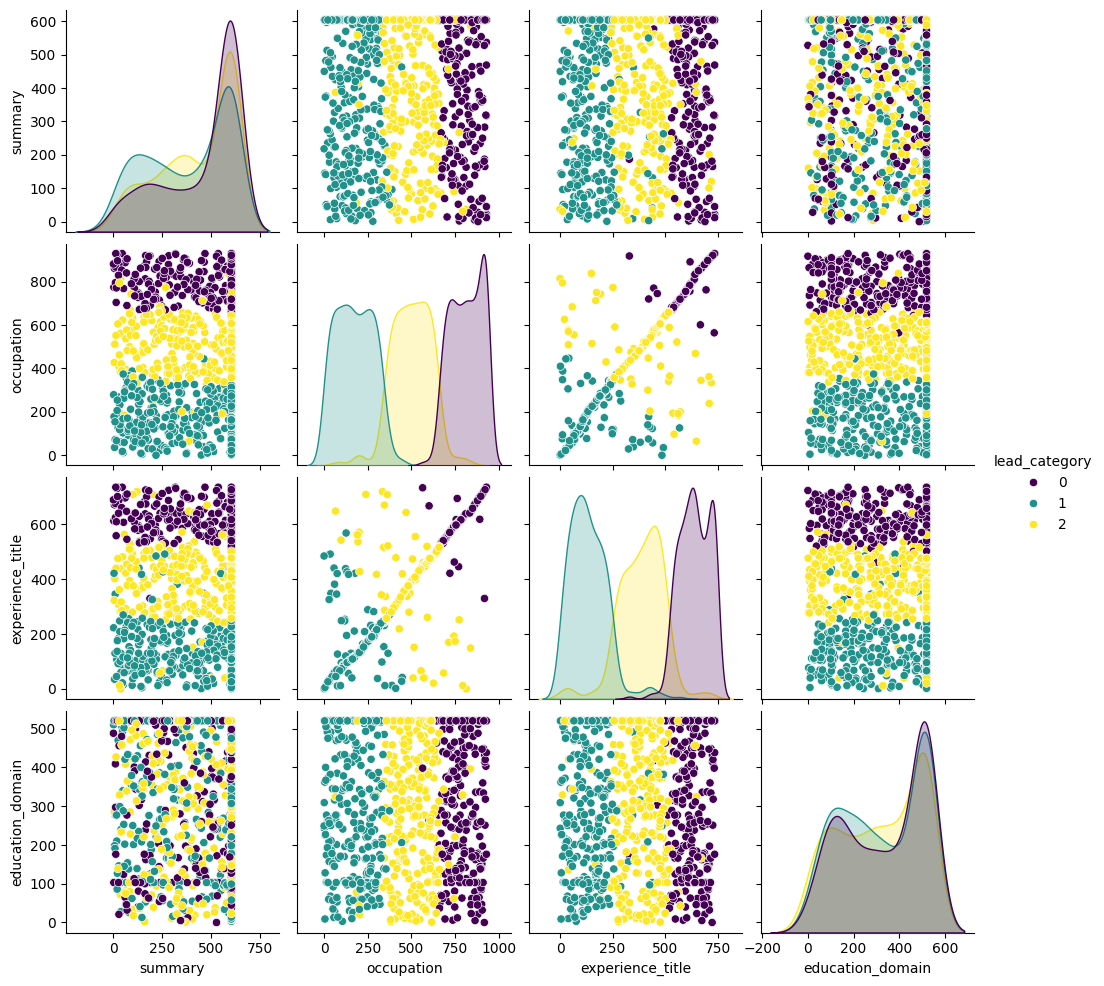

In [12]:
# Visualisation des clusters en utilisant un nuage de points pour chaque paire de fonctionnalités
sns.pairplot(X, hue='lead_category', palette='viridis')
plt.show()

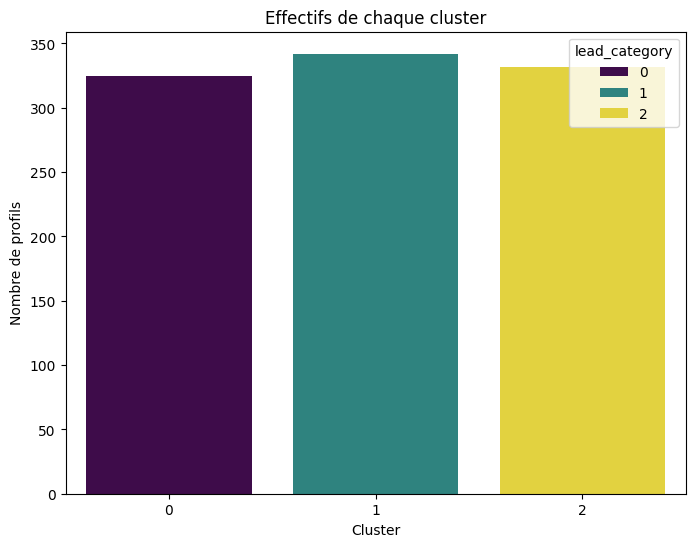

In [8]:
# Visualisation des effectifs de chaque cluster avec un diagramme en barres
plt.figure(figsize=(8, 6))
sns.countplot(x='lead_category', data=X, palette='viridis', hue='lead_category')
plt.title('Effectifs de chaque cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de profils')
plt.show()